### reference
```
https://github.com/nltk/nltk/wiki/Stanford-CoreNLP-API-in-NLTK
```

In [2]:
import os
import nltk.data
import networkx as nx
from pymongo import MongoClient
from nltk.parse import CoreNLPParser, CoreNLPDependencyParser
from nltk.parse.corenlp import CoreNLPServer

SERVER_URL = 'http://localhost:9000'
DB_CONNECTION = 'mongodb://localhost:27017'

client = MongoClient(DB_CONNECTION)


```
lsof -t -i:9000
kill -9 $(lsof -t -i:9000)
java -mx4g -cp "*" edu.stanford.nlp.pipeline.StanfordCoreNLPServer -port 9000 -timeout 15000
```

In [3]:
parser = CoreNLPParser(url=SERVER_URL)
sample_review = client.course_evals.entries.find_one()
list(parser.parse(sample_review['RESPONSE_TEXT'].split()))

[Tree('ROOT', [Tree('FRAG', [Tree('NP', [Tree('NP', [Tree('JJ', ['Facial']), Tree('NN', ['anatomy'])]), Tree(',', [',']), Tree('NP', [Tree('NNS', ['muscles'])])]), Tree(',', [',']), Tree('FRAG', [Tree('NP', [Tree('JJ', ['skeletal']), Tree('NN', ['structure'])]), Tree(',', [',']), Tree('S', [Tree('VP', [Tree('VBG', ['drawing']), Tree('NP', [Tree('NNS', ['techniques'])]), Tree('PP', [Tree('IN', ['for']), Tree('NP', [Tree('NNS', ['skulls'])])])])])])])])]

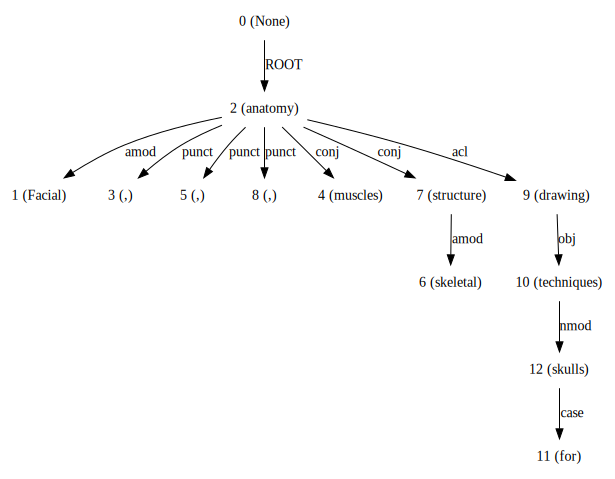

In [4]:
dep_parser = CoreNLPDependencyParser(url=SERVER_URL)
dep_grph = list(dep_parser.parse(sample_review['RESPONSE_TEXT'].split()))[0]
dep_grph

In [5]:
for i in range(len(dep_grph.nodes)):
    print(f"Word: {dep_grph.nodes[i]['word']}\tLemma: {dep_grph.nodes[i]['lemma']}\tTag: {dep_grph.nodes[i]['tag']}\tHead: {dep_grph.nodes[i]['head']}\tRel: {dep_grph.nodes[i]['rel']}")

Word: None	Lemma: None	Tag: TOP	Head: None	Rel: None
Word: Facial	Lemma: facial	Tag: JJ	Head: 2	Rel: amod
Word: anatomy	Lemma: anatomy	Tag: NN	Head: 0	Rel: ROOT
Word: ,	Lemma: ,	Tag: ,	Head: 2	Rel: punct
Word: muscles	Lemma: muscle	Tag: NNS	Head: 2	Rel: conj
Word: ,	Lemma: ,	Tag: ,	Head: 2	Rel: punct
Word: skeletal	Lemma: skeletal	Tag: JJ	Head: 7	Rel: amod
Word: structure	Lemma: structure	Tag: NN	Head: 2	Rel: conj
Word: ,	Lemma: ,	Tag: ,	Head: 2	Rel: punct
Word: drawing	Lemma: draw	Tag: VBG	Head: 2	Rel: acl
Word: techniques	Lemma: technique	Tag: NNS	Head: 9	Rel: obj
Word: for	Lemma: for	Tag: IN	Head: 12	Rel: case
Word: skulls	Lemma: skull	Tag: NNS	Head: 10	Rel: nmod


In [6]:
dep_grph.nodes

defaultdict(<function nltk.parse.dependencygraph.DependencyGraph.__init__.<locals>.<lambda>()>,
            {0: {'address': 0,
              'word': None,
              'lemma': None,
              'ctag': 'TOP',
              'tag': 'TOP',
              'feats': None,
              'head': None,
              'deps': defaultdict(list, {'ROOT': [2]}),
              'rel': None},
             1: {'address': 1,
              'word': 'Facial',
              'lemma': 'facial',
              'ctag': 'JJ',
              'tag': 'JJ',
              'feats': '_',
              'head': 2,
              'deps': defaultdict(list, {}),
              'rel': 'amod'},
             2: {'address': 2,
              'word': 'anatomy',
              'lemma': 'anatomy',
              'ctag': 'NN',
              'tag': 'NN',
              'feats': '_',
              'head': 0,
              'deps': defaultdict(list,
                          {'amod': [1],
                           'punct': [3, 5, 8],
      